In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

`
Has the network latency gone up since we switched internet service providers?
Is the website redesign any good?
Is our television ad driving more sales?
`


Has switching providers increased latency in the network?

* H0: Switching providers did not increase latency.   
    * Type 1: (boy is alive, no wolf, people came). False positive/The p-value is < alpha indicating low confidence and resulting a false positive.
* HA: We are 95% confident that switching providers has increased latency in our network.
    * Type 2: (boy is dead, wolf is present, people don't come). False negative/The p-value is > (?) alpha indicating over confidence that switching providers caused the latency. Latency problem still exists outside of this sample!

Has redesigning the website lead to increased _measurable (efficiency, UI, speed)_ in place of 'good'?

* H0: Redesigning the website has not improved _measurable_.
    * Type 1: (False Positive). The sample data grabbed provided false confidence that the site redesign/_measurable_ relationship is valid.

* HA: Redesigning the website has improved _measurable_.
    * Type 2: (False Negative). The sample data grabbed provided a false LACK of confidence that the relationship between site redesign and _measurable_ value is significant.

Has the television ad increased sales?

* H0: Television ad does not increase sales.
    * Type 1: (False Positive). Relationship between increased sales and television ad is deemed significant when it is in fact, weak.

* HA: The television ad did increase sales.
    * Type 2: (False Negative). The relationship between the ad and sales is deemed insignificant; when it is, in fact, significant. Boy is dead. Wolf is present. People don't come to help.

# Comparison of Means

Answer with the type of test you would use (assume normal distribution):

* Is there a difference in grades of students on the second floor compared to grades of all students?

    `* Bubble in a bubble, one-sample two-tailed test`
    
* Are adults who drink milk taller than adults who dont drink milk?

    `* Two bubbles, independent (can't be both), greater than for height: I would use a two-sample one-tailed test`
    
* Is the the price of gas higher in texas or in new mexico?

    `* Two bubbles, two-sample one-tailed test`
    
* Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

    `* More than 2 groups, ANOVA. two-tailed ANOVA test to determine IF there is a difference`

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [199]:
office1_m = 90
office1_sd = 15
office2_m = 100
office2_sd = 20
alpha = 0.05
n1=40
n2=50

In [200]:
df1 = pd.DataFrame(np.random.normal(office1_m, office1_sd, size=n1))
df2 = pd.DataFrame(np.random.normal(office2_m, office2_sd, size=n2))

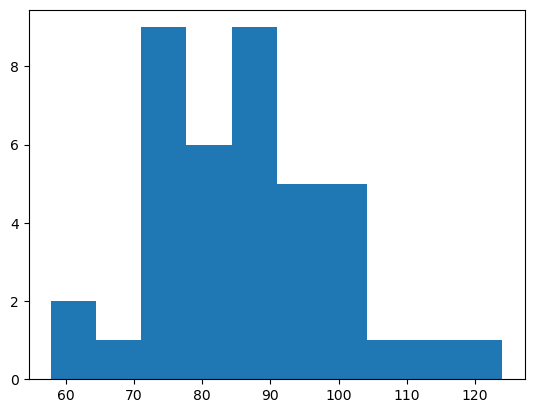

In [201]:
plt.hist(df1)
plt.show()

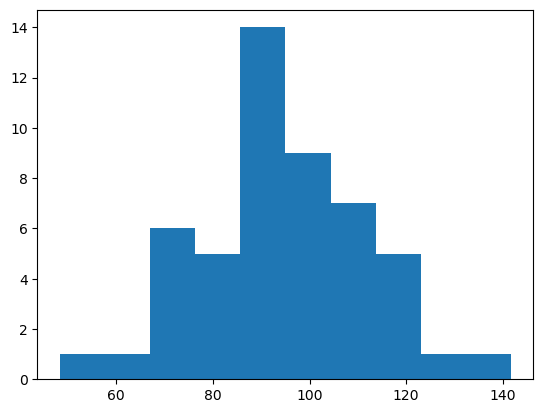

In [202]:
plt.hist(df2)
plt.show()

$H_{0}$ : There is not a difference in the average sale time between office 1 and office 2.

$H_{a}$ : There is a difference in the average sale time between office 1 and office 2.

Assumptions: Not normal, 40 observations (low but valid)

In [217]:
df1.var(), df2.var()

(0    194.277897
 dtype: float64,
 0    312.34006
 dtype: float64)

In [203]:
tstat, pval = stats.ttest_ind(df1, df2)
tstat, pval

(array([-2.43669174]), array([0.01683624]))

Difference significant, reject the null hypothesis

## Andrew's Way

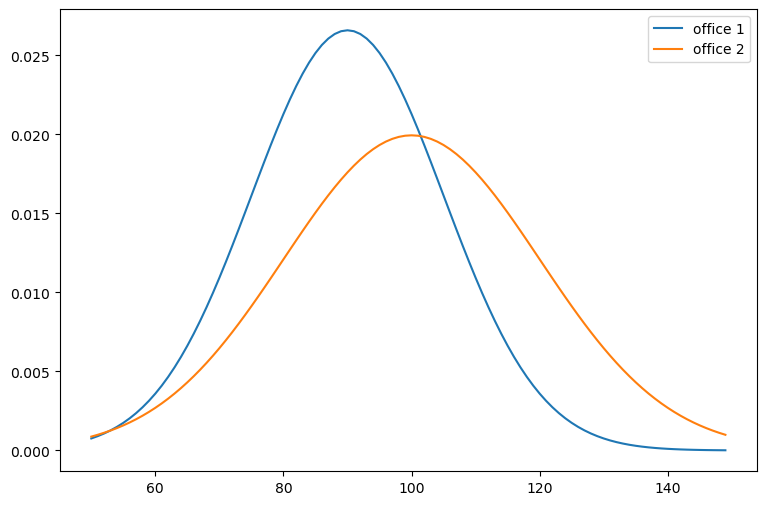

In [198]:
x = np.arange(50,150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.figure(figsize = (9,6))
plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.legend()
plt.show()

In [207]:
office_1 = stats.norm(90, 15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)

In [209]:
alpha = 0.05

In [210]:
stat, pval = stats.levene(office_1, office_2)
stat, pval

(4.102881044795635, 0.04583970992058288)

In [211]:
tstat, pval = stats.ttest_ind(office_1, office_2, equal_var=False)
tstat, pval

(-2.024085067738832, 0.04602940643130389)

In [212]:
if pval < alpha:
    print('Reject the Null')
else:
    print('Fail to Reject the Null')

Reject the Null


Barely significant result, can reject the null hypothesis

## IND_FROM_STATS

In [220]:
# only works for two different datasets where you don't have the 
# data to back it up, just the mean, sd, and sample size
stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

Significant, reject the null

## MPG

Load the mpg dataset and use it to answer the following questions:

* Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

    * two tail, two sample

$H_{0}$ = There is no difference in efficiency in cars from 2008 vs 1999

$H_{a}$ = There is a difference in efficiency in cars from 2008 vs 1999


There are different types of mean!

Arithmatic Mean : The one we know and love

Harmonic Mean : Things over time, something over a duration, miles per hour (stats.hemean())

Geometric Mean : ??

In [49]:
from pydataset import data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [72]:
mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [222]:
mpg['avg_mileage'] = stats.hmean(mpg[['cty', 'hwy']], axis = 1)

In [224]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [232]:
theoretical_mean = mpg.avg_mileage
theoretical_mean

1      22.212766
2      24.360000
3      24.313725
4      24.705882
5      19.809524
         ...    
230    22.638298
231    24.360000
232    19.809524
233    21.272727
234    20.558140
Name: avg_mileage, Length: 234, dtype: float64

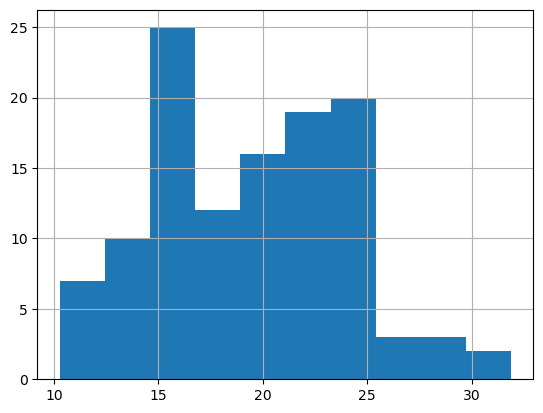

In [233]:
avg_08 = mpg[mpg.year == 2008].avg_mileage
avg_08.hist()
plt.show()

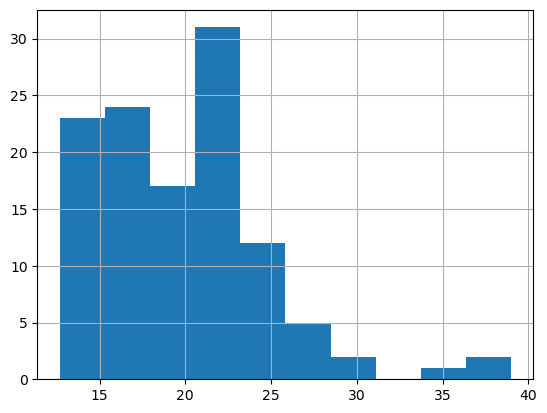

In [234]:
avg_99 = mpg[mpg.year == 1999].avg_mileage
avg_99.hist()
plt.show()

### Variance True?

In [235]:
stats.levene(avg_08, avg_99) # TRUE! p > a

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [236]:
tstat, pval = stats.f_oneway(theoretical_mean, avg_08, avg_99)
tstat, pval

(0.04544847670182439, 0.9555730795247104)

In [237]:
tstat, pval = stats.ttest_ind(avg_08, avg_99)
tstat, pval

(-0.3011962975077886, 0.7635345888327115)

In [238]:
if pval < alpha:
    print('Reject the Null')
else:
    print('Fail to Reject the Null')

Fail to Reject the Null


* Are compact cars more fuel-efficient than the average car?
    * one-sample, one-tail test

$H_{0}$ = compact cars do not have greater fuel efficiency against the avg car

$H_{a}$ = compact cars do have greater fuel efficiency against the avg car

In [239]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [241]:
mpg[['class']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   234 non-null    object
dtypes: object(1)
memory usage: 11.8+ KB


In [259]:
over_avg = mpg.avg_mileage
over_avg

1      22.212766
2      24.360000
3      24.313725
4      24.705882
5      19.809524
         ...    
230    22.638298
231    24.360000
232    19.809524
233    21.272727
234    20.558140
Name: avg_mileage, Length: 234, dtype: float64

In [260]:
compact_avg = mpg[mpg['class'] == 'compact'].avg_mileage
compact_avg

1      22.212766
2      24.360000
3      24.313725
4      24.705882
5      19.809524
6      21.272727
7      21.600000
8      21.272727
9      19.512195
10     23.333333
11     22.304348
12     18.750000
13     20.238095
14     20.238095
15     18.750000
142    24.360000
143    22.304348
170    22.222222
171    22.978723
172    21.590909
173    22.978723
187    23.625000
188    24.360000
189    25.038462
190    25.735849
191    21.272727
192    21.272727
193    21.600000
194    26.666667
195    27.789474
196    29.836066
197    31.876923
198    29.836066
208    24.360000
209    21.955556
210    24.360000
211    25.019608
212    19.902439
213    37.714286
214    24.360000
215    21.955556
216    25.019608
217    24.360000
218    24.360000
219    24.360000
220    18.871795
221    19.902439
Name: avg_mileage, dtype: float64

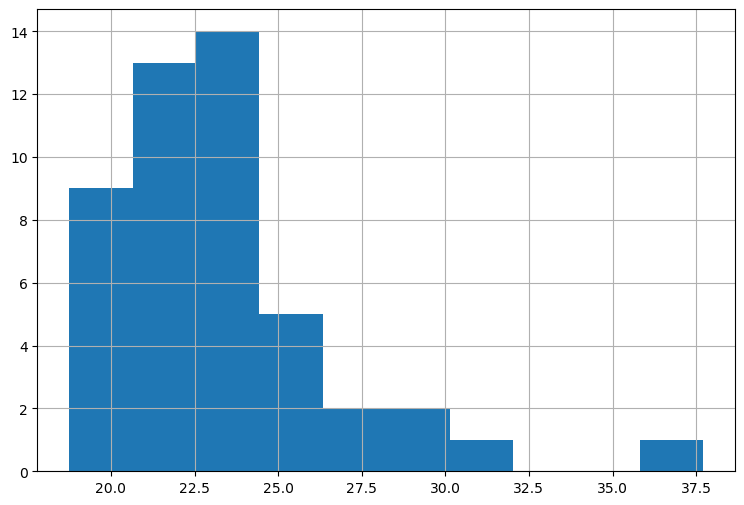

In [261]:
plt.figure(figsize=(9,6))
compact_avg.hist()
plt.show()

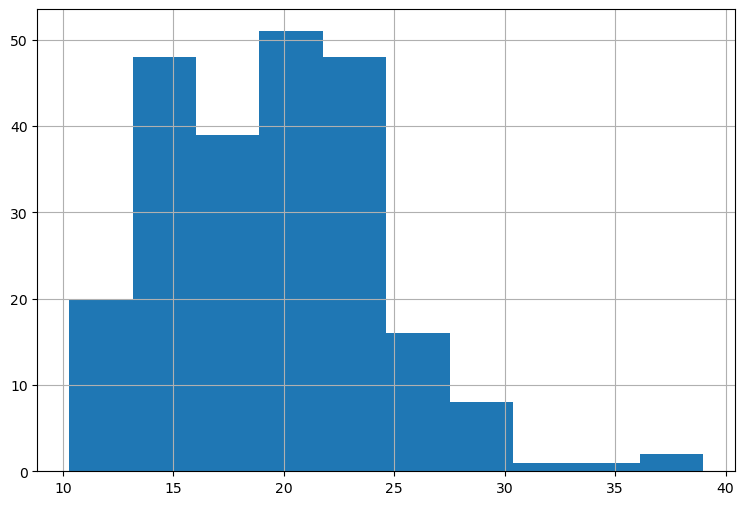

In [262]:
plt.figure(figsize=(9,6))
over_avg.hist()
plt.show()

In [264]:
tstat, pval = stats.ttest_1samp(compact_avg, over_avg.mean())
tstat, (pval/2)

(7.512360093161354, 7.808833174403864e-10)

In [265]:
compact_avg.mean(), over_avg.mean()

(23.500416808701296, 19.585525317633177)

In [268]:
if ((pval < alpha) and (tstat > 0)):
    print('Reject the Null')
else:
    print('Fail to Reject the Null')

Reject the Null


* Do manual cars get better gas mileage than automatic cars?
    * two sample, one-tail

$H_{0}$ = manual cars do not have greater fuel efficiency against automatic cars

$H_{a}$ = manual cars do have greater fuel efficiency against automatic cars

In [106]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [176]:
auto_car = mpg[mpg.trans.str.contains('auto')].avg_mileage

In [177]:
manual_car = mpg[mpg.trans.str.contains('manual')].avg_mileage

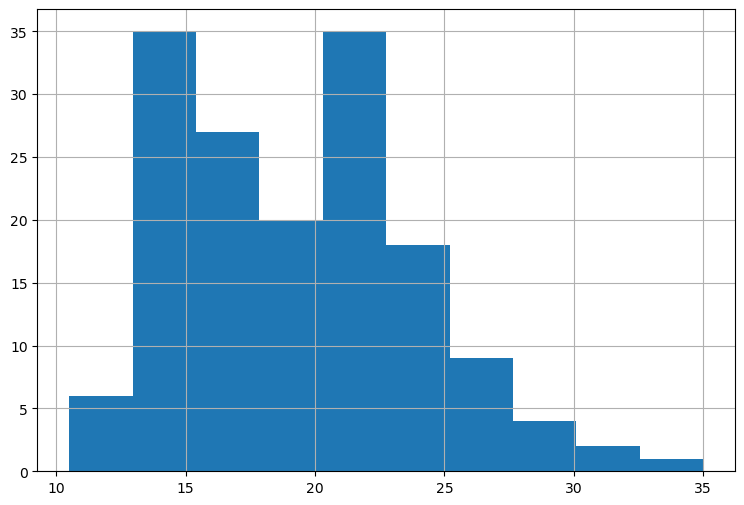

In [272]:
plt.figure(figsize=(9,6))
auto_car.hist()
plt.show()

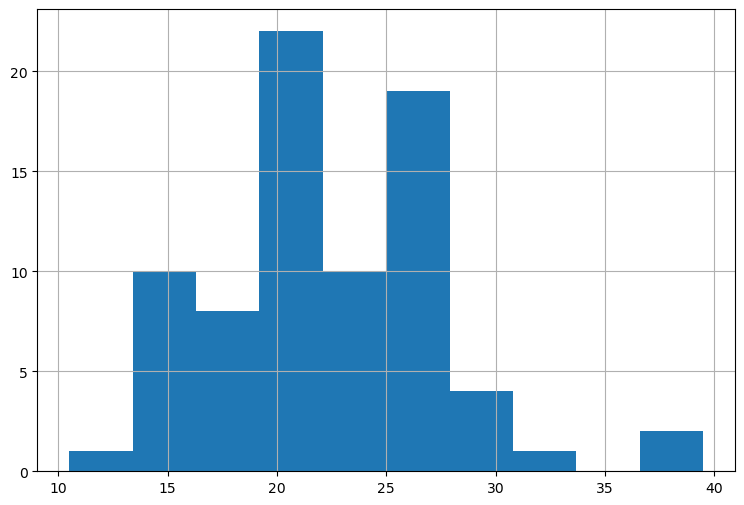

In [273]:
plt.figure(figsize=(9,6))
manual_car.hist()
plt.show()

## Variance Check because TWO SAMPLE

In [275]:
stats.levene(auto_car, manual_car) # p > a, TRUE!

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [276]:
tstat, pval = stats.ttest_ind(auto_car, manual_car)
tstat, pval/2

(-4.593437735750014, 3.5771872005728416e-06)

In [277]:
if ((pval < alpha) and (tstat < 0)):
    print('Reject the Null')
else:
    print('Fail to Reject the Null')

Reject the Null
